In [33]:
import pandas as pd
import pandas_profiling
import seaborn as sns
from matplotlib import style
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import itertools
import warnings
from IPython.core import display as ICD
warnings.filterwarnings('ignore')

In [231]:
data = pd.read_csv('./Datasets- I/car_mileage.csv')

In [24]:
data

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [14]:
data.isnull().sum()

mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

In [15]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
IQR

mpg       7.37500
cyl       4.00000
disp    205.17500
hp       83.50000
drat      0.84000
wt        1.02875
qsec      2.00750
vs        1.00000
am        1.00000
gear      1.00000
carb      2.00000
dtype: float64

In [20]:
outlier = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

In [21]:
outlier.isnull().sum()

mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

<AxesSubplot:>

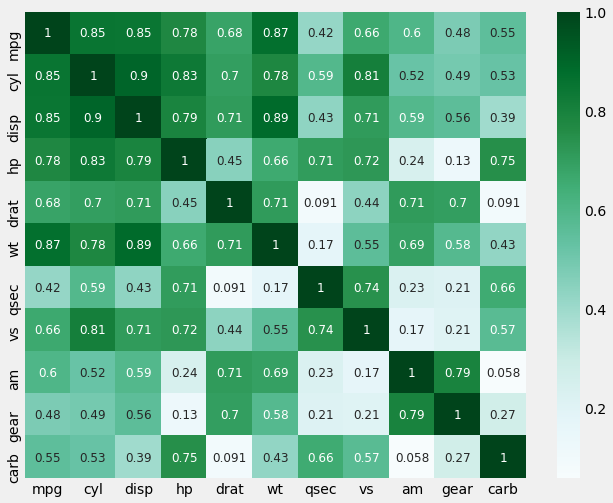

In [233]:
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(data.corr().abs(), cmap = 'BuGn',annot=True , annot_kws={"size": 12}, ax = ax)

In [28]:
l = [{'mpg':['cyl','disp','wt','hp']},{'cyl':['disp','hp','wt']},{'disp':['hp','wt']},{'vs':['cyl']}]

In [234]:
air_data = pd.read_csv('./Datasets- I/AirPassengersImpute.csv')

In [235]:
air_data

,Unnamed: 0,x
0,1,112.0
1,2,118.0
2,3,132.0
3,4,129.0
4,5,121.0
...,...,...
139,140,606.0
140,141,NaN
141,142,NaN
142,143,390.0


In [70]:
data = pd.read_csv("./Git Hub/ml-basics/data/diabetes.csv").iloc[:,1:]

In [71]:
a = data.describe()

In [79]:
Missing_Col = ['PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI']
for i in Missing_Col:
    data[i].replace(0,data[i].median(),inplace = True)

In [66]:
data.isnull().sum()

Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

In [80]:
b = data.describe()

In [81]:
a.iloc[2:3,:-1]

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
std,3.39102,31.981975,16.758716,14.555716,133.068252,9.759,0.377944,12.089703


In [82]:
b.iloc[2:3,:-1]

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
std,3.39102,31.981975,16.758716,14.555716,133.068252,9.759,0.377944,12.089703


In [89]:
air_data.isnull().sum()

Unnamed: 0     0
x             12
dtype: int64

In [34]:
quality = pd.read_csv('./Datasets- I/airquality.csv').iloc[:,1:]

In [35]:
a = quality.describe().loc['std',:]
a = pd.DataFrame(a)

In [36]:
impf = quality.fillna(method = 'ffill',inplace=False)
impb = quality.fillna(method = 'bfill',inplace=False)

In [37]:
mean = quality.fillna(value=quality.mean(),inplace=False)

In [38]:
median = quality.fillna(value=quality.median(),inplace=False)

In [39]:
drop = quality.dropna(inplace=False)

In [23]:
b = mean.describe().loc['std',:]
#b = imp.describe()
#b = median.describe()
#b = drop.describe()

In [30]:
#a['imp(x)'] = b['x']
a['mean(x)'] = pd.DataFrame(b).iloc[:,1:]
#a['median(x)'] = b['x']
#a['ffill(x)'] = b['x']
#a['drop'] = b['x']

In [31]:
pd.DataFrame(a)

,std
Unnamed: 0,44.3114
Ozone,32.9879
Solar.R,90.0584
Wind,3.523
Temp,9.46527
Month,1.41652
Day,8.86452
mean(x),Empty DataFrame Columns: [] Index: [Unnamed: 0...


In [18]:
quality = pd.read_csv('./Datasets- I/airquality.csv').iloc[:,1:]

In [45]:
quality.isnull().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [188]:
quality.fillna(method = 'bfill',inplace=True)

In [147]:
quality

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41.0,190.0,7.4,67,5,1
1,2,36.0,118.0,8.0,72,5,2
2,3,12.0,149.0,12.6,74,5,3
3,4,18.0,313.0,11.5,62,5,4
4,5,28.0,299.0,14.3,56,5,5
...,...,...,...,...,...,...,...
148,149,30.0,193.0,6.9,70,9,26
149,150,14.0,145.0,13.2,77,9,27
150,151,14.0,191.0,14.3,75,9,28
151,152,18.0,131.0,8.0,76,9,29


In [149]:
cols = ['Ozone', 'Solar.R', 'Wind', 'Temp']

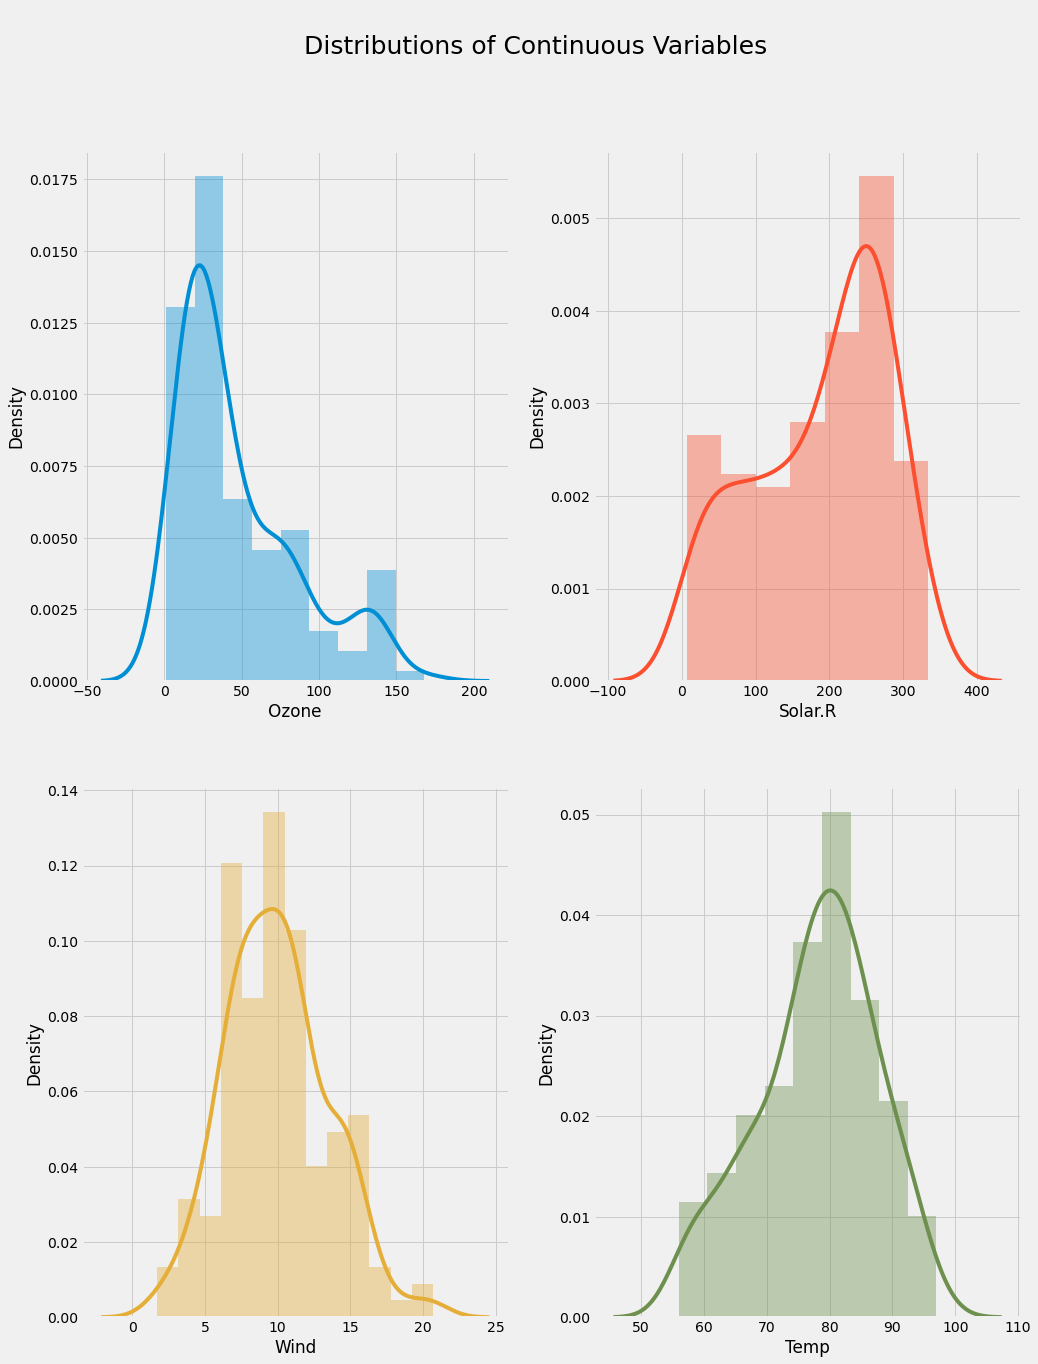

In [225]:
style.use('fivethirtyeight')
#sns.set_palette('Accent')
palette = itertools.cycle(sns.color_palette())
n_rows, n_cols = (2,2)
figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(15, 20))
figure.suptitle('\nDistributions of Continuous Variables', fontsize=25)
for index, column in enumerate(cols):
    i,j = (index // n_cols), (index % n_cols)
    fig=sns.distplot(quality[column], norm_hist=True,
                            ax=axes[i,j], color=next(palette))

<AxesSubplot:xlabel='Month', ylabel='Ozone'>

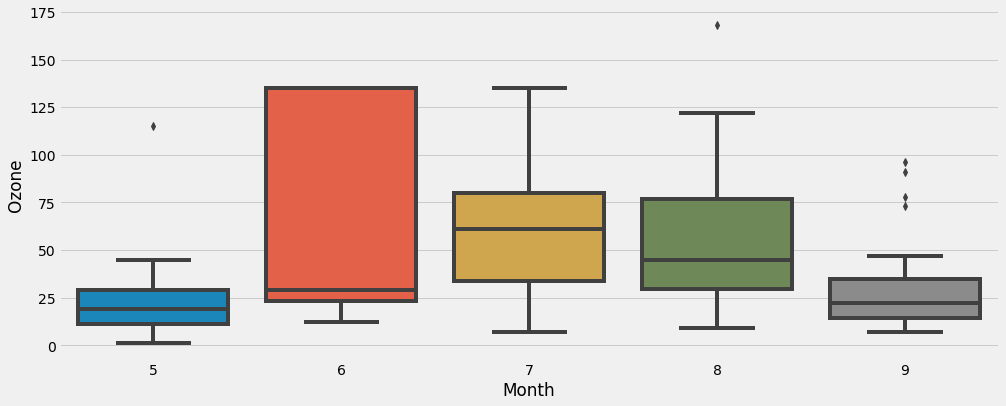

In [174]:
fig = plt.figure(figsize=(15, 6))
sns.boxplot(data = quality, x = 'Month', y = 'Ozone')

In [176]:
grp = quality.groupby('Month')

In [183]:
grp['Temp'].var()

Month
5    46.989247
6    43.541379
7    18.623656
8    43.365591
9    69.817241
Name: Temp, dtype: float64

In [194]:
quality[(quality.Month == 5)&(quality.Day>20)].loc[:,'Solar.R'].describe()

count     11.000000
mean     141.545455
std      125.574969
min        8.000000
25%       19.000000
50%       92.000000
75%      259.000000
max      320.000000
Name: Solar.R, dtype: float64

In [198]:
grpDay = quality.groupby('Day')

In [202]:
grpDay['Temp'].mean()

Day
1     80.200000
2     80.800000
3     79.400000
4     81.800000
5     79.200000
6     79.800000
7     80.800000
8     81.200000
9     81.600000
10    82.000000
11    83.200000
12    79.200000
13    77.600000
14    78.000000
15    73.400000
16    75.400000
17    73.200000
18    71.600000
19    74.800000
20    76.600000
21    70.200000
22    74.600000
23    75.000000
24    74.200000
25    72.200000
26    74.800000
27    76.200000
28    81.400000
29    82.800000
30    81.800000
31    83.666667
Name: Temp, dtype: float64

<AxesSubplot:xlabel='Day', ylabel='Temp'>

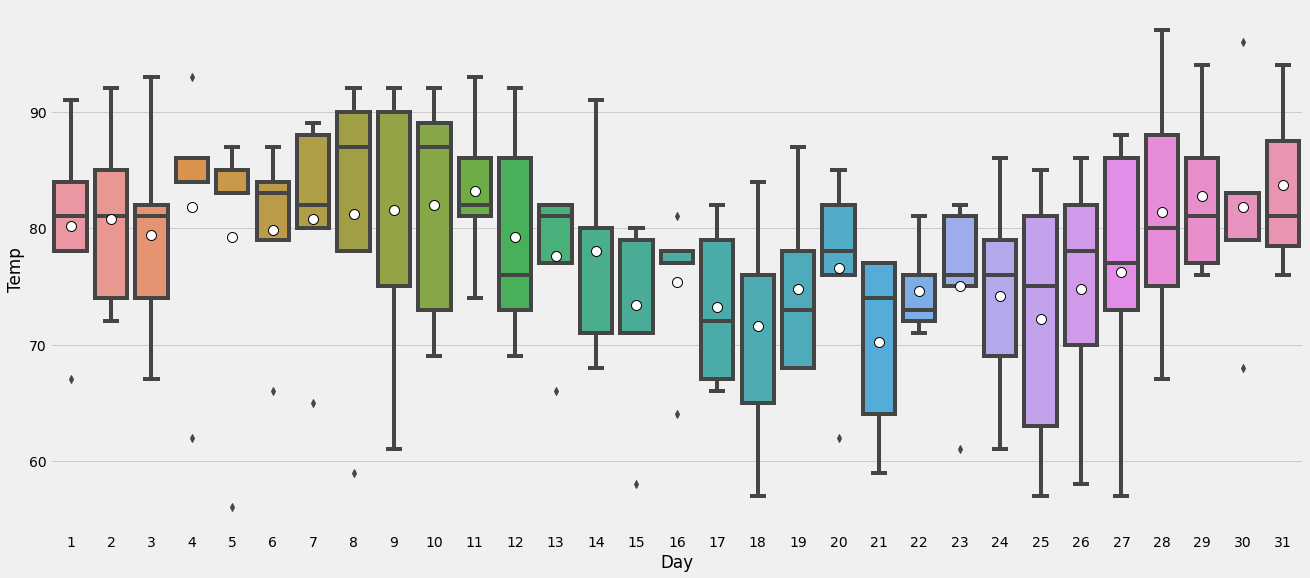

In [238]:
fig = plt.figure(figsize=(20, 9))
sns.boxplot(data = quality, y = 'Temp', x = 'Day', showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})

In [210]:
days = [2,3,10,11,12,14,17,18,19,21,23,24,25,26,27,28,29,31]

In [241]:
quality[(quality.Month == 5)&(quality.Day<20)].loc[:,['Solar.R']].describe()

,Solar.R
count,19.000000
mean,219.000000
std,101.374443
min,19.000000
25%,133.500000
50%,256.000000
75%,299.000000
max,334.000000


In [215]:
quality[(quality.Month == 5)].loc[:,['Solar.R','Ozone']].corr()

,Solar.R,Ozone
Solar.R,1.000000,0.208765
Ozone,0.208765,1.000000


In [216]:
quality[(quality.Day<20)].loc[:,['Solar.R','Ozone']].corr()

,Solar.R,Ozone
Solar.R,1.000000,0.178447
Ozone,0.178447,1.000000


In [4]:
quality[(quality.Month == 5)&(quality.Day<20)].loc[:,['Solar.R','Ozone']].corr()

,Solar.R,Ozone
Solar.R,1.000000,0.223238
Ozone,0.223238,1.000000


In [83]:
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

In [45]:
names = ['original','FFill','BFill','Mean','Median','Drop']

In [47]:
cols = [quality,impf,impb,mean,median,drop]
for ind,i in enumerate (cols):
    print(names[ind],round(i.loc[:,'Ozone'].var(),2))

original 1088.2
FFill 996.0
BFill 1460.89
Mean 823.31
Median 844.16
Drop 1107.29


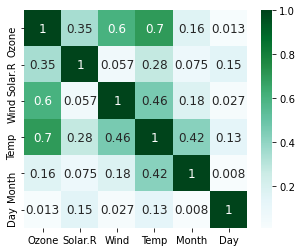

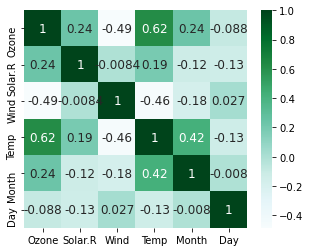

In [49]:
quality = a = pd.read_csv('./Datasets- I/airquality.csv').iloc[:,1:]
fig, ax = plt.subplots(figsize=(5,4)) 
sns.heatmap(quality.corr().abs(), cmap = 'BuGn',annot=True , annot_kws={"size": 12}, ax = ax)
quality.fillna(method = 'ffill',inplace=True)

'''quality = a
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(quality.corr().abs(), cmap = 'BuGn',annot=True , annot_kws={"size": 12}, ax = ax)
quality.fillna(method = 'bfill',inplace=True)

quality = a
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(quality.corr().abs(), cmap = 'BuGn',annot=True , annot_kws={"size": 12}, ax = ax)
quality.fillna(value = quality.mean(),inplace=True)'''

quality = a
fig, ax = plt.subplots(figsize=(5,4)) 
sns.heatmap(quality.corr(), cmap = 'BuGn',annot=True , annot_kws={"size": 12}, ax = ax)
quality.fillna(value = quality.median(),inplace=True)


In [51]:
excel = pd.read_excel('C:/Users/1771138/Downloads/Book-2.xlsx')

In [52]:
excel

,a,b,c
0,1,1,1
1,2,2,2
2,3,3,3
3,4,4,4
4,5,5,5
5,6,6,6
6,7,7,7
7,8,8,8
8,9,9,9
9,10,10,10


In [54]:
import pickle as pk

In [62]:
dbfile = open('excel_pk', 'ab')

In [63]:
pk.dump(excel, dbfile)                     
dbfile.close()

In [64]:
dbfile = open('excel_pk', 'rb')

In [66]:
ex = pk.load(dbfile)                     
dbfile.close()

In [67]:
ex

,a,b,c
0,1,1,1
1,2,2,2
2,3,3,3
3,4,4,4
4,5,5,5
5,6,6,6
6,7,7,7
7,8,8,8
8,9,9,9
9,10,10,10


In [69]:
b = pk.dumps(excel)       
myEntry = pk.loads(b)